In [1]:
import io
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline

import polars as pl
from skimpy import skim
from summarytools import dfSummary
#summarytools doesnt work with polars library, it works with pandas tho

#%load_ext cudf.pandas
#supercharges workflow with GPU acceleration using cudf.pandas
#Im having pip install issues with cudf so commenting it out for now

In [3]:
df = pd.read_csv('task2.csv')
df.head()

,ra,dec,Ar,upsf,uErr,gpsf,gErr,rpsf,rErr,ipsf,...,FeH,FeHErr,Teff,TeffErr,logg,loggErr,alphFe,alphFeErr,radVel,radVelErr
0,195.23747,0.606508,0.073,17.634,0.018,16.332,0.019,15.846,0.016,15.604,...,-1.089900,0.030980,5444.7,41.665,3.5327,0.15321,0.34660,0.011413,25.552,1.8332
1,335.76130,68.938230,1.411,19.234,0.034,17.760,0.012,17.056,0.015,16.742,...,0.001674,0.055153,6504.6,100.270,3.8041,0.24929,0.14320,0.021661,-96.675,4.3140
2,71.74272,23.006353,1.143,19.896,0.042,17.531,0.013,16.463,0.012,15.982,...,-0.687980,0.053411,5176.8,151.680,2.5562,0.15029,0.08612,0.019791,13.824,1.6119
3,217.52050,45.368070,0.028,19.559,0.037,18.538,0.037,18.115,0.018,17.874,...,-2.079900,0.033797,5530.8,32.848,3.0689,0.13729,0.41754,0.023220,-121.390,4.4987
4,123.46826,46.542100,0.143,19.573,0.032,18.467,0.018,18.299,0.015,18.212,...,-0.996280,0.038266,6956.3,37.893,4.1999,0.46672,0.27915,0.011338,13.075,7.2742


In [ ]:
# wtf does all the columns even mean rahhhhhhhhhhhhhhhhhhhhhh

In [5]:
# list all the columns
df.columns

Index(['ra', 'dec', 'Ar', 'upsf', 'uErr', 'gpsf', 'gErr', 'rpsf', 'rErr',
       'ipsf', 'iErr', 'zpsf', 'zErr', 'pmL', 'pmB', 'pmErr', 'mjd', 'plate',
       'fiber', 'SNR', 'FeH', 'FeHErr', 'Teff', 'TeffErr', 'logg', 'loggErr',
       'alphFe', 'alphFeErr', 'radVel', 'radVelErr'],
      dtype='object')

In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 54321  │ │ float64     │ 30    │                                                          │
│ │ Number of columns │ 30     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column     ┃ NA  ┃ NA %  ┃ mean     ┃ sd        ┃ p0       ┃ p25     ┃ p50     ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ra         │   0 │     0 │    167.6 │     96.18 │  0.01281 │   111.7 │   167.2 │   229.8 │    360 │ ▆▃▇▆▃▃ │  │
│ │ dec        │   0 │     0 │    22.79 │     21.66 │   -19.58 │   3.708 │    20.7 │   38.81 │  84.76 │ ▂▇▆▅▃  │  │
│ │ Ar         │   0 │     0 │   0.1789 │    0.2775 │    0.007 │   0.062 │     0.1 │   0.176 │  4.878 │   ▇    │  │
│ │ upsf       │   0 │     0 │    19.06 │     1.215 │    15.26 │   18.15 │   19.16 │   19.96 │  24.94 │  ▁▅▇▃  │  │
│ │ uErr       │   0 │     0 │  0.04022 │   0.02883 │    0.011 │   0.024 │   0.032 │   0.047 │  1.303 │   ▇    │  │
│ │ gpsf       │   0 │     0 │    17.75 │     1.176 │    14.15 │   16.88 │   17.84 │   18.63 │  21.98 │ ▁▅▇▇▂  │  │
│ │ gErr       │   0 │     0 │  0.02196 │   0.01266 │     0.01 │   0.018 │   0.021 │   0.024 │  2.419 │   ▇    │  │
│ │ rpsf       │   0 │     0 │    17.24 │     1.186 │    14.01 │   16.36 │    17.3 │   18.14 │  20.17 │ ▁▃▇▇▆▁ │  │
│ │ rErr       │   0 │     0 │  0.01935 │  0.009097 │     0.01 │   0.016 │   0.018 │   0.021 │  1.052 │   ▇    │  │
│ │ ipsf       │   0 │     0 │    17.05 │       1.2 │    13.83 │   16.16 │   17.08 │   17.96 │   20.1 │ ▁▅▇▇▆▁ │  │
│ │ iErr       │   0 │     0 │  0.02006 │  0.009602 │     0.01 │   0.017 │   0.019 │   0.022 │  1.213 │   ▇    │  │
│ │ zpsf       │   0 │     0 │    16.96 │     1.211 │    13.54 │   16.07 │   16.98 │   17.88 │  20.29 │ ▁▅▇▇▅  │  │
│ │ zErr       │   0 │     0 │  0.02612 │   0.01065 │    0.011 │    0.02 │   0.023 │   0.029 │  0.746 │   ▇    │  │
│ │ pmL        │   0 │     0 │    1.392 │     11.21 │   -146.3 │   -3.29 │    0.99 │    5.49 │  199.2 │    ▇   │  │
│ │ pmB        │   0 │     0 │   -1.113 │     9.132 │   -176.4 │   -4.62 │   -0.81 │    2.75 │  142.9 │     ▇  │  │
│ │ pmErr      │   0 │     0 │    2.843 │     0.384 │     2.09 │    2.58 │    2.77 │    3.03 │   9.12 │   ▇▁   │  │
│ │ mjd        │   0 │     0 │    54020 │     849.6 │    51580 │   53420 │   54330 │   54740 │  55010 │ ▁▁▂▃▃▇ │  │
│ │ plate      │   0 │     0 │     2397 │     798.6 │      266 │    2038 │    2551 │    3112 │   3480 │ ▂▂▂▇▇▇ │  │
│ │ fiber      │   0 │     0 │    323.5 │     184.2 │        1 │     165 │     326 │     482 │    640 │ ▇▇▇▇▇▇ │  │
│ │ SNR        │   0 │     0 │    35.11 │     17.64 │       10 │   20.85 │    32.2 │   45.85 │  122.6 │  ▇▇▃▁  │  │
│ │ FeH        │   0 │     0 │   -0.997 │    0.6332 │    -4.49 │  -1.441 │ -0.8535 │ -0.5174 │  0.745 │   ▂▅▇▁ │  │
│ │ FeHErr     │   0 │     0 │  0.05959 │   0.04308 │     0.03 │ 0.03918 │ 0.04952 │ 0.06513 │  1.261 │   ▇    │  │
│ │ Teff       │   0 │     0 │     5768 │     678.2 │   

In [7]:
"""ra — Right Ascension (sky longitude), usually degrees.
dec — Declination (sky latitude), usually degrees.
Ar — Extinction in r‑band (A_r) or r‑band reddening (mag).
upsf / gpsf / rpsf / ipsf / zpsf — PSF magnitudes in u,g,r,i,z bands (point‑source photometry).
uErr / gErr / rErr / iErr / zErr — 1σ uncertainties for respective magnitudes.
pmL / pmB — proper motion components (µ_l, µ_b) in galactic longitude/latitude (typically mas/yr).
pmErr — proper motion uncertainty (mas/yr).
mjd — Modified Julian Date of the observation.
plate — Spectroscopic plate id.
fiber — Fiber number on the plate.
SNR — Spectrum signal‑to‑noise ratio (per pixel or per resolution element).
FeH — [Fe/H] metallicity (dex).
FeHErr — uncertainty on [Fe/H] (dex).
Teff — Effective temperature (K).
TeffErr — uncertainty on Teff (K).
logg — Surface gravity (log10 g, cgs).
loggErr — uncertainty on logg.
alphFe — [α/Fe] (alpha‑element abundance relative to Fe, dex).
alphFeErr — uncertainty on [α/Fe].
radVel — Radial velocity (km/s).
radVelErr — uncertainty on radial velocity (km/s)."""

'ra — Right Ascension (sky longitude), usually degrees.\ndec — Declination (sky latitude), usually degrees.\nAr — Extinction in r‑band (A_r) or r‑band reddening (mag).\nupsf / gpsf / rpsf / ipsf / zpsf — PSF magnitudes in u,g,r,i,z bands (point‑source photometry).\nuErr / gErr / rErr / iErr / zErr — 1σ uncertainties for respective magnitudes.\npmL / pmB — proper motion components (µ_l, µ_b) in galactic longitude/latitude (typically mas/yr).\npmErr — proper motion uncertainty (mas/yr).\nmjd — Modified Julian Date of the observation.\nplate — Spectroscopic plate id.\nfiber — Fiber number on the plate.\nSNR — Spectrum signal‑to‑noise ratio (per pixel or per resolution element).\nFeH — [Fe/H] metallicity (dex).\nFeHErr — uncertainty on [Fe/H] (dex).\nTeff — Effective temperature (K).\nTeffErr — uncertainty on Teff (K).\nlogg — Surface gravity (log10 g, cgs).\nloggErr — uncertainty on logg.\nalphFe — [α/Fe] (alpha‑element abundance relative to Fe, dex).\nalphFeErr — uncertainty on [α/Fe].\n

In [ ]:
# there are no null values in the dataset
df.isnull().sum()

ra           0
dec          0
Ar           0
upsf         0
uErr         0
gpsf         0
gErr         0
rpsf         0
rErr         0
ipsf         0
iErr         0
zpsf         0
zErr         0
pmL          0
pmB          0
pmErr        0
mjd          0
plate        0
fiber        0
SNR          0
FeH          0
FeHErr       0
Teff         0
TeffErr      0
logg         0
loggErr      0
alphFe       0
alphFeErr    0
radVel       0
radVelErr    0
dtype: int64

In [9]:
# Define reusable functions and column selectors
def get_column_types(dataframe):
    return {
        'object_cols': dataframe.select_dtypes(include='object').columns,
        'numerical_cols': dataframe.select_dtypes(include=['number']).columns
    }

def create_subplot_grid(n_items, max_cols=4):
    n_cols = min(max_cols, n_items)
    n_rows = (n_items + n_cols - 1) // n_cols
    return n_rows, n_cols

def plot_categorical_distributions(dataframe, cols, title_suffix="", figsize_multiplier=3):
    n_rows, n_cols = create_subplot_grid(len(cols), 4)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * figsize_multiplier))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()

    colors = sns.color_palette("Set2", len(cols))

    for i, col in enumerate(cols):
        counts = dataframe[col].value_counts(dropna=False)
        counts.plot(kind='bar', ax=axes[i], color=colors[i], alpha=0.8)
        axes[i].set_title(f'{col.title()}{title_suffix}', fontsize=12, pad=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45, labelsize=9)

        # Add count labels on bars
        for j, v in enumerate(counts.values):
            axes[i].text(j, v + max(counts.values) * 0.01, str(v),
                        ha='center', va='bottom', fontsize=8)

    # Remove extra subplots
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    return fig, axes

def plot_numerical_distributions(dataframe, cols, title_suffix="", show_missing=True):
    n_rows, n_cols = create_subplot_grid(len(cols), 4)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
    axes = axes.flatten()

    colors = sns.color_palette("plasma", len(cols))

    for i, col in enumerate(cols):
        ax = axes[i]

        # Create histogram
        dataframe[col].hist(bins=20, ax=ax, alpha=0.7, color=colors[i],
                           edgecolor='black', linewidth=0.5)

        # Add statistics
        col_mean = dataframe[col].mean()
        col_median = dataframe[col].median()
        col_missing = dataframe[col].isnull().sum()

        ax.axvline(col_mean, color='red', linestyle='--', alpha=0.8,
                  label=f'Mean: {col_mean:.1f}')
        ax.axvline(col_median, color='blue', linestyle='--', alpha=0.8,
                  label=f'Median: {col_median:.1f}')

        ax.set_title(f'{col}{title_suffix}', fontsize=11, pad=10)
        ax.set_xlabel('')
        ax.set_ylabel('Frequency', fontsize=10)
        ax.legend(fontsize=8, loc='upper right')

        # Add missing count annotation if requested
        if show_missing and col_missing > 0:
            ax.text(0.02, 0.98, f'Missing: {col_missing}', transform=ax.transAxes,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='orange', alpha=0.7),
                    fontsize=8)
        elif not show_missing:
            ax.text(0.02, 0.98, f'Complete: {len(dataframe) - col_missing}/{len(dataframe)}',
                    transform=ax.transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
                    fontsize=8)

    # Remove extra subplots
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    return fig, axes

def plot_boxplots_for_outliers(dataframe, cols, title_suffix=""):
    """Reusable function for boxplot visualization to detect outliers"""
    n_rows, n_cols = create_subplot_grid(len(cols), 4)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
    axes = axes.flatten()

    colors = sns.color_palette("coolwarm", len(cols))

    for i, col in enumerate(cols):
        ax = axes[i]

        # Create styled boxplot
        bp = ax.boxplot(dataframe[col].dropna(), patch_artist=True,
                       boxprops=dict(facecolor=colors[i], alpha=0.7),
                       medianprops=dict(color='black', linewidth=2),
                       flierprops=dict(marker='o', markerfacecolor='red', alpha=0.6, markersize=4))

        # Calculate outlier statistics
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)).sum()

        # Add outlier count annotation
        ax.text(0.02, 0.98, f'Outliers: {outliers_count}',
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                fontsize=9)

        ax.set_title(f'{col}{title_suffix}', fontsize=11, pad=10)
        ax.set_ylabel('Value', fontsize=10)
        ax.grid(True, alpha=0.3)

    # Remove extra subplots
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    return fig, axes

def cap_outliers_iqr(dataframe, columns, multiplier=1.5):
    """
    Winsorize (clip) outliers using the IQR method.

    Parameters:
    - dataframe: Input DataFrame
    - columns: List/Index of numeric columns to process
    - multiplier: IQR multiplier for outlier bounds (default 1.5)

    For each column:
    1. Compute Q1, Q3, IQR
    2. Compute lower = Q1 - multiplier*IQR; upper = Q3 + multiplier*IQR
    3. Count outliers before
    4. Clip values to [lower, upper]
    5. Count remaining outliers (should be zero or near-zero due to numeric precision)
    """
    df_capped = dataframe.copy()
    outlier_stats = {}

    for col in columns:
        if col in df_capped.columns:
            Q1 = df_capped[col].quantile(0.25)
            Q3 = df_capped[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR

            outliers_before = ((df_capped[col] < lower_bound) | (df_capped[col] > upper_bound)).sum()

            df_capped[col] = df_capped[col].clip(lower_bound, upper_bound)

            outliers_after = ((df_capped[col] < lower_bound) | (df_capped[col] > upper_bound)).sum()

            outlier_stats[col] = {
                'outliers_before': int(outliers_before),
                'outliers_after': int(outliers_after),
                'lower_bound': float(lower_bound),
                'upper_bound': float(upper_bound),
                'Q1': float(Q1),
                'Q3': float(Q3),
                'IQR': float(IQR)
            }

    return df_capped, outlier_stats

In [10]:
# Define column types once - this will be updated as data changes
column_info = get_column_types(df)
print(f"Dataset loaded with {len(column_info['object_cols'])} categorical and {len(column_info['numerical_cols'])} numerical columns")

Dataset loaded with 0 categorical and 30 numerical columns


In [13]:
print("Dataset information:")
print(f"Numerical columns: {len(df.select_dtypes(include=['number']).columns)}")
print(f"Text/Categorical columns: {len(df.select_dtypes(include=['object']).columns)}")
print(f"Target variable: Surface gravity (log10 g, cgs) column-(logg)")

Dataset information:
Numerical columns: 30
Text/Categorical columns: 0
Target variable: Surface gravity (log10 g, cgs) column-(logg)


In [12]:
# check for duplicates once
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_count}")


Duplicate rows: 0


Total missing values: 0
Percentage missing: 0.00%


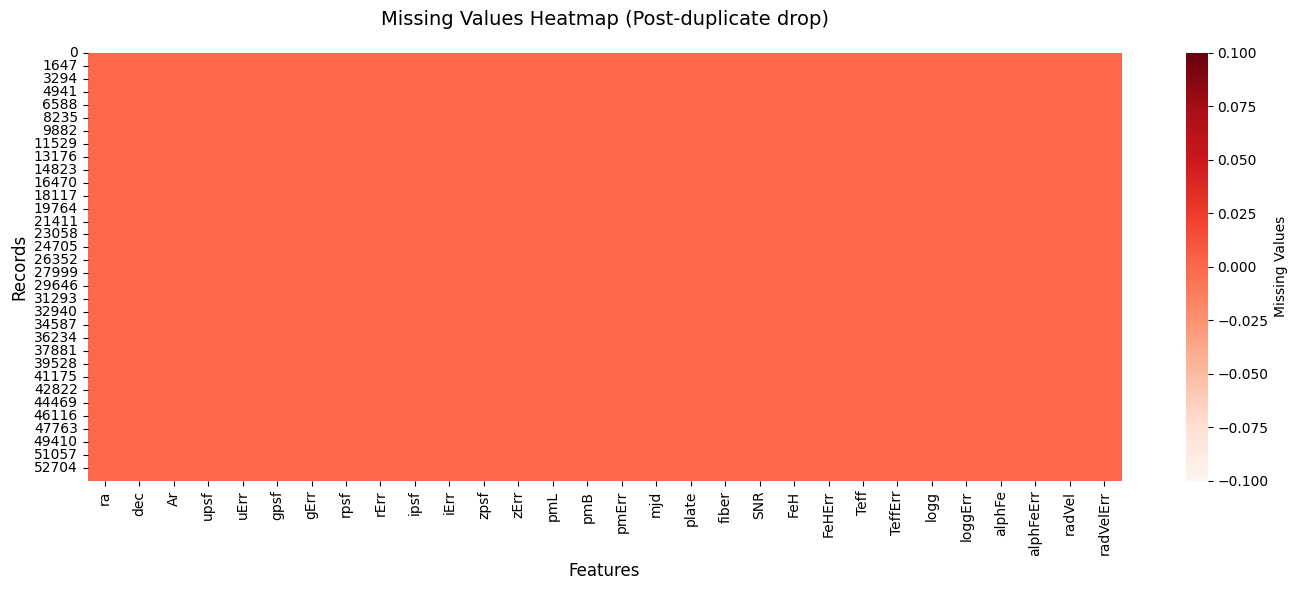

In [14]:
# calculate missing values statistics once
missing_stats = {
    'missing_values': df.isnull().sum(),
    'total_missing': df.isnull().sum().sum(),
    'total_cells': df.shape[0] * df.shape[1]
}

print(f"Total missing values: {missing_stats['total_missing']}")
print(f"Percentage missing: {(missing_stats['total_missing'] / missing_stats['total_cells']) * 100:.2f}%")

# clean, focused heatmap
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='Reds',
           cbar_kws={'label': 'Missing Values'}, ax=ax)
ax.set_title('Missing Values Heatmap (Post-duplicate drop)', fontsize=14, pad=20)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Records', fontsize=12)
plt.tight_layout()
plt.show()

Outlier detection analysis using boxplots:


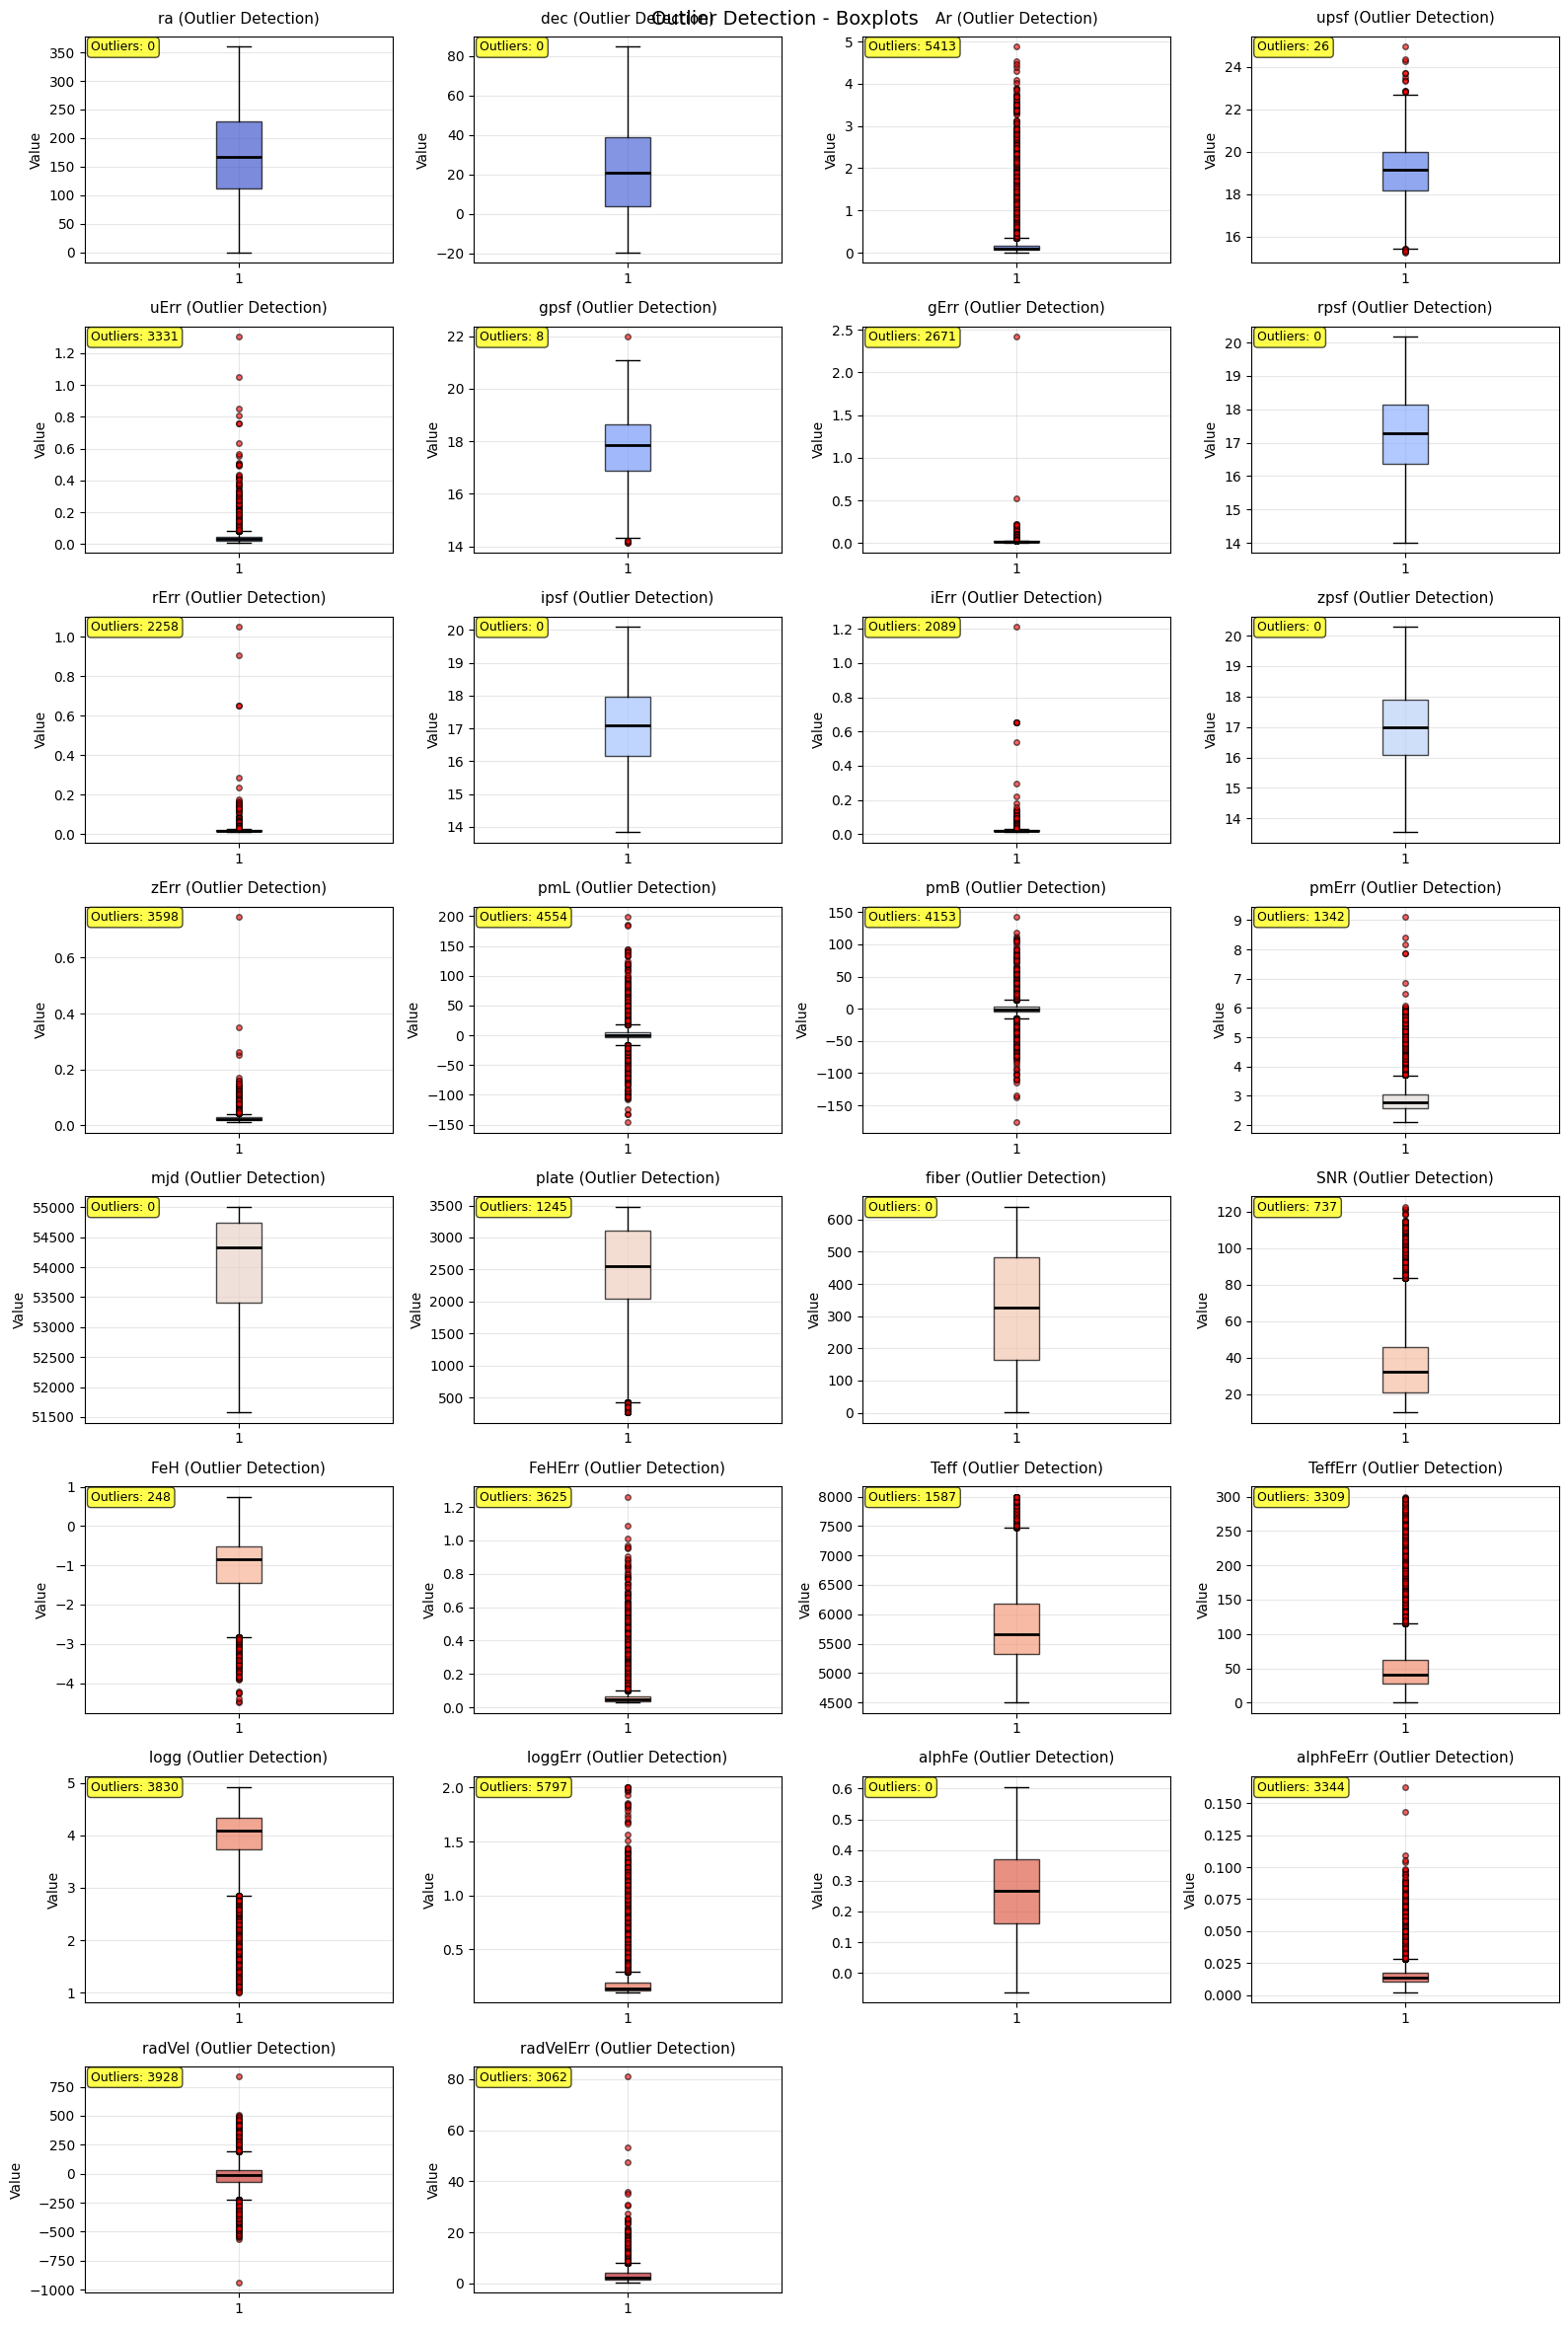

In [16]:
# display outlier detection using boxplots
print("Outlier detection analysis using boxplots:")
fig, axes = plot_boxplots_for_outliers(df, column_info['numerical_cols'],
                                      title_suffix=" (Outlier Detection)")
plt.suptitle('Outlier Detection - Boxplots', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

In [19]:
# store original data for comparison
df_before_capping = df.copy()

# apply IQR-based winsorization (clipping) to numeric features except target
print("Applying outlier capping using IQR clipping (multiplier=2.5)...")
num_cols = column_info['numerical_cols'].drop(['logg', 'Teff'], errors='ignore')
df_capped, outlier_statistics = cap_outliers_iqr(df, num_cols, multiplier=1.5)

# display outlier statistics
total_outliers_capped = 0
print("Outlier analysis results:")
for col, stats in outlier_statistics.items():
    if stats['outliers_before'] > 0:
        print(f"{col}: {stats['outliers_before']} -> {stats['outliers_after']} after capping")
        total_outliers_capped += stats['outliers_before']

print(f"Total outliers processed: {total_outliers_capped}")
print(f"Percentage of cells affected: {(total_outliers_capped / (len(df) * len(num_cols))) * 100:.2f}%")

# update the main dataframe
df = df_capped.copy()

Applying outlier capping using IQR clipping (multiplier=2.5)...
Outlier analysis results:
Ar: 5413 -> 0 after capping
upsf: 26 -> 0 after capping
uErr: 3331 -> 0 after capping
gpsf: 8 -> 0 after capping
gErr: 2671 -> 0 after capping
rErr: 2258 -> 0 after capping
iErr: 2089 -> 0 after capping
zErr: 3598 -> 0 after capping
pmL: 4554 -> 0 after capping
pmB: 4153 -> 0 after capping
pmErr: 1342 -> 0 after capping
plate: 1245 -> 0 after capping
SNR: 737 -> 0 after capping
FeH: 248 -> 0 after capping
FeHErr: 3625 -> 0 after capping
TeffErr: 3309 -> 0 after capping
loggErr: 5797 -> 0 after capping
alphFeErr: 3344 -> 0 after capping
radVel: 3928 -> 0 after capping
radVelErr: 3062 -> 0 after capping
Total outliers processed: 54738
Percentage of cells affected: 3.60%


Outliers after capping:


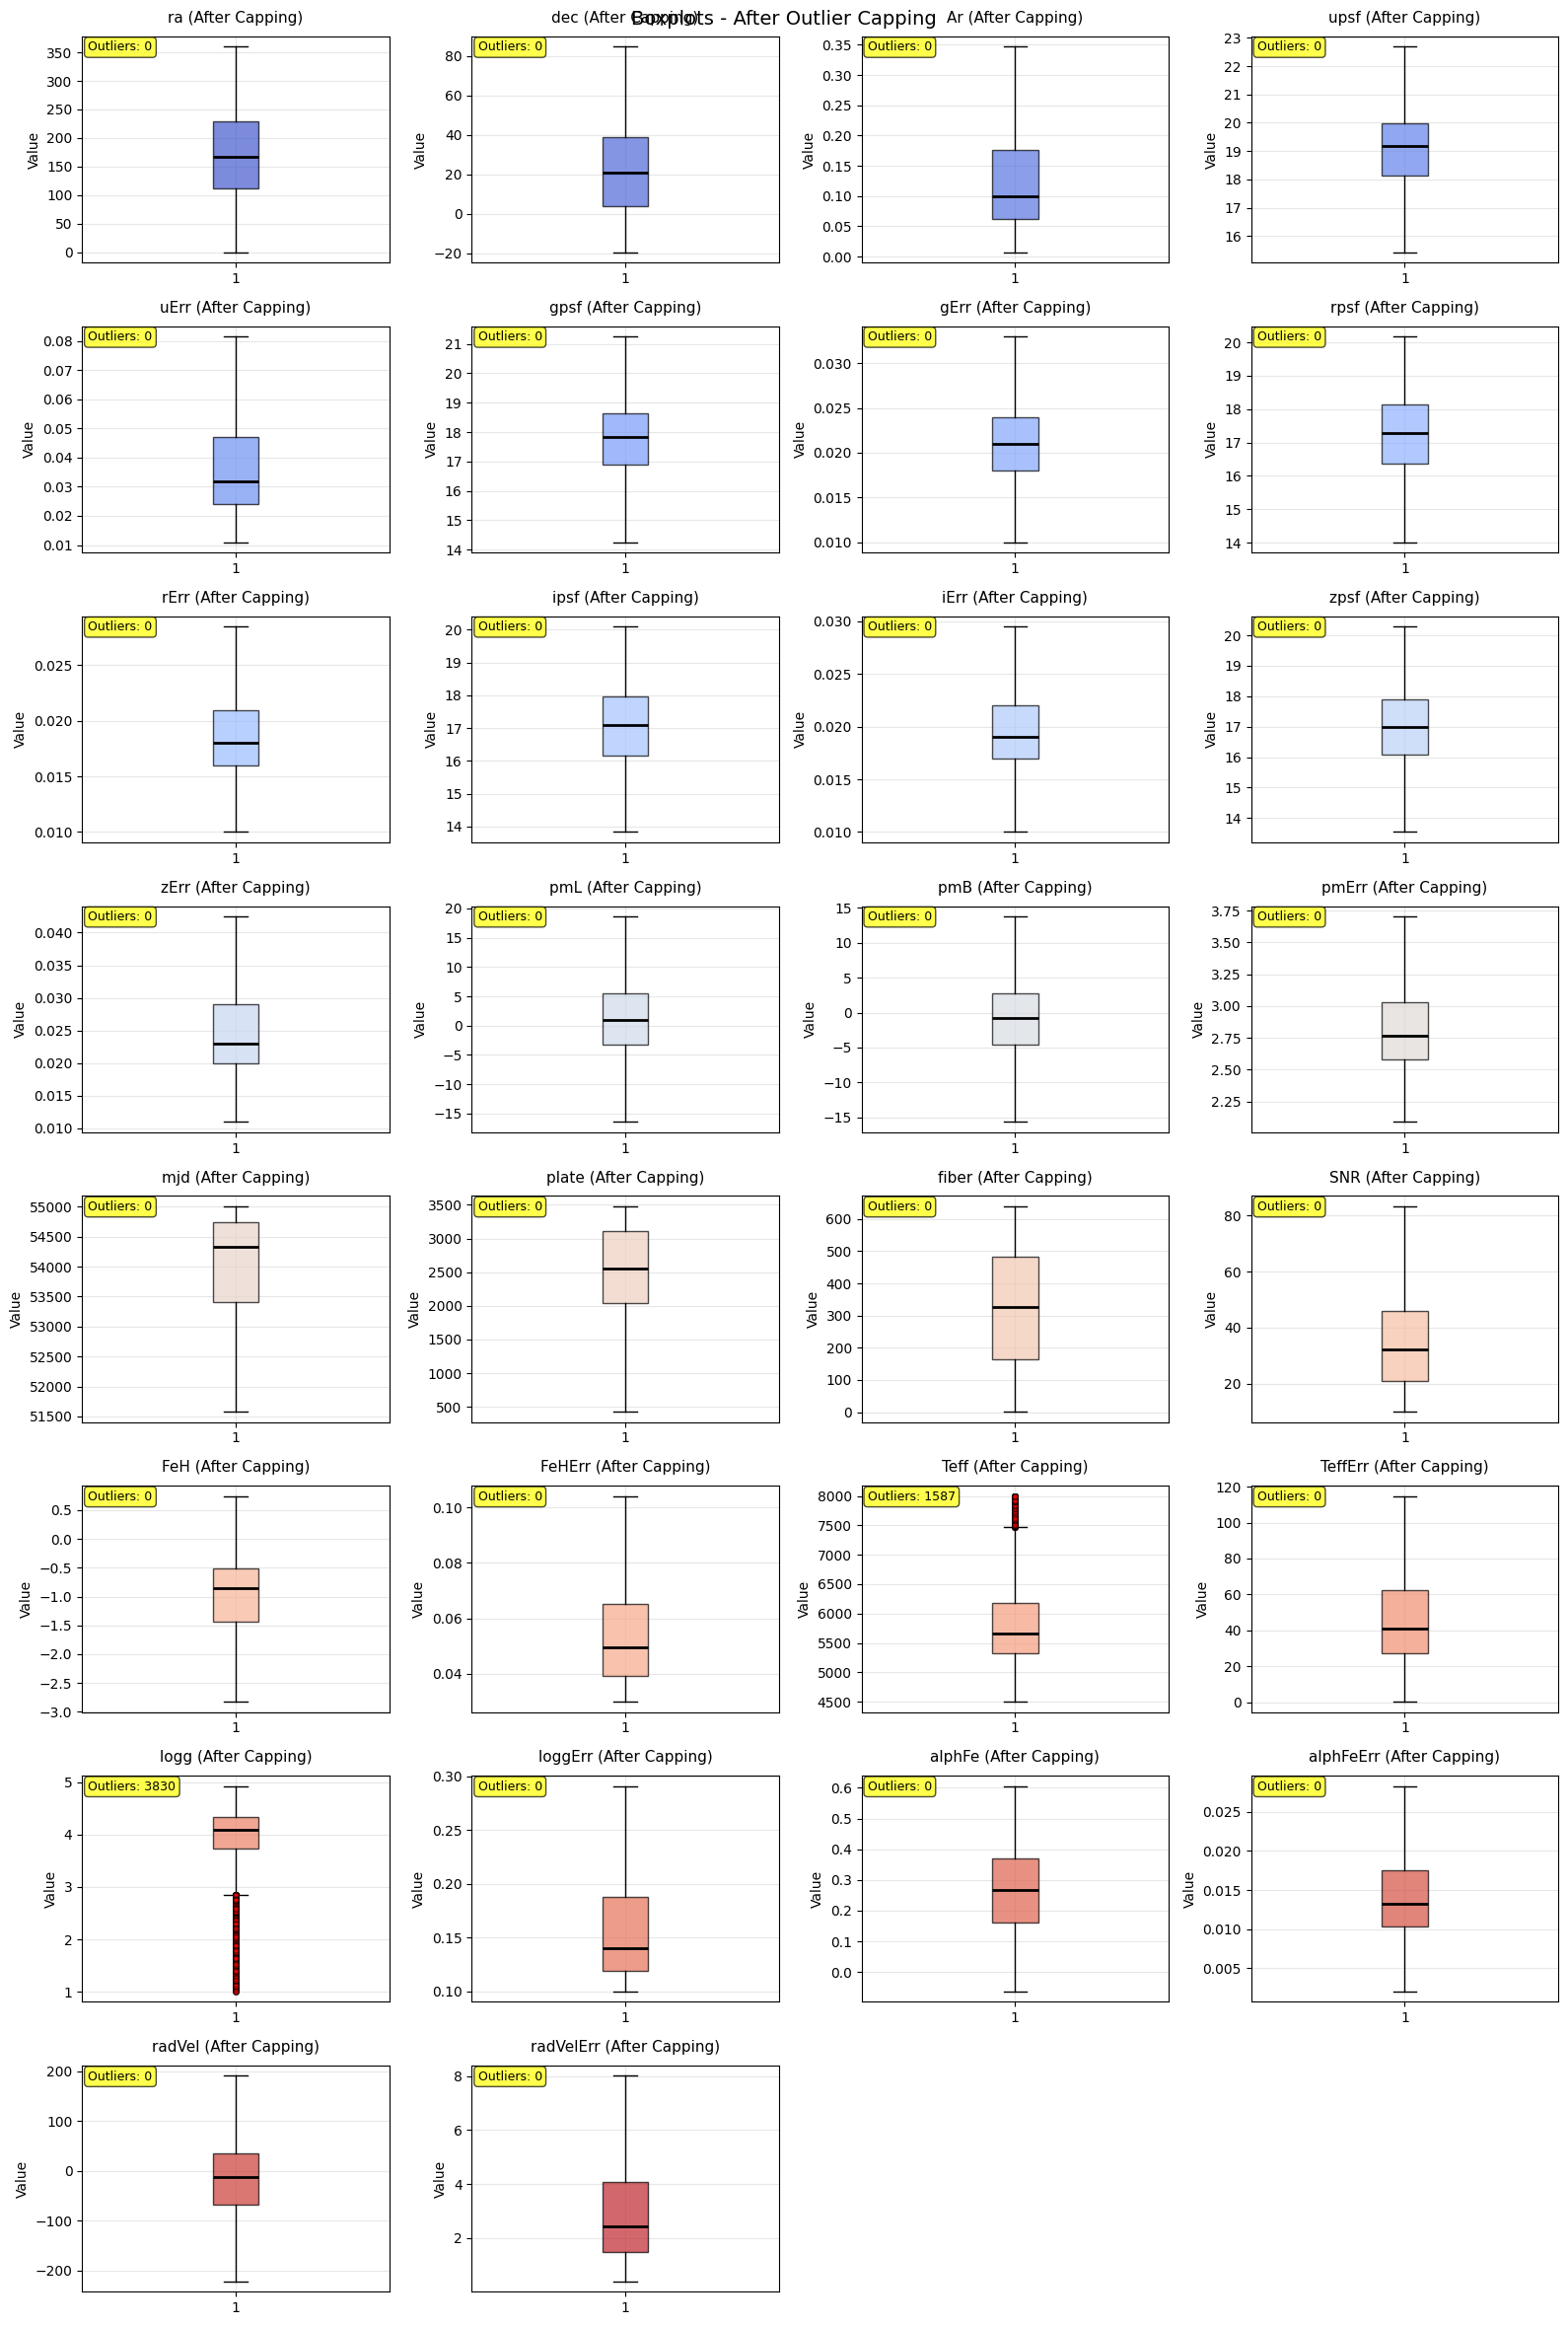

In [20]:
# visualize outliers after capping using boxplots
print("Outliers after capping:")
fig, axes = plot_boxplots_for_outliers(df, column_info['numerical_cols'],
                                      title_suffix=" (After Capping)")
plt.suptitle('Boxplots - After Outlier Capping', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

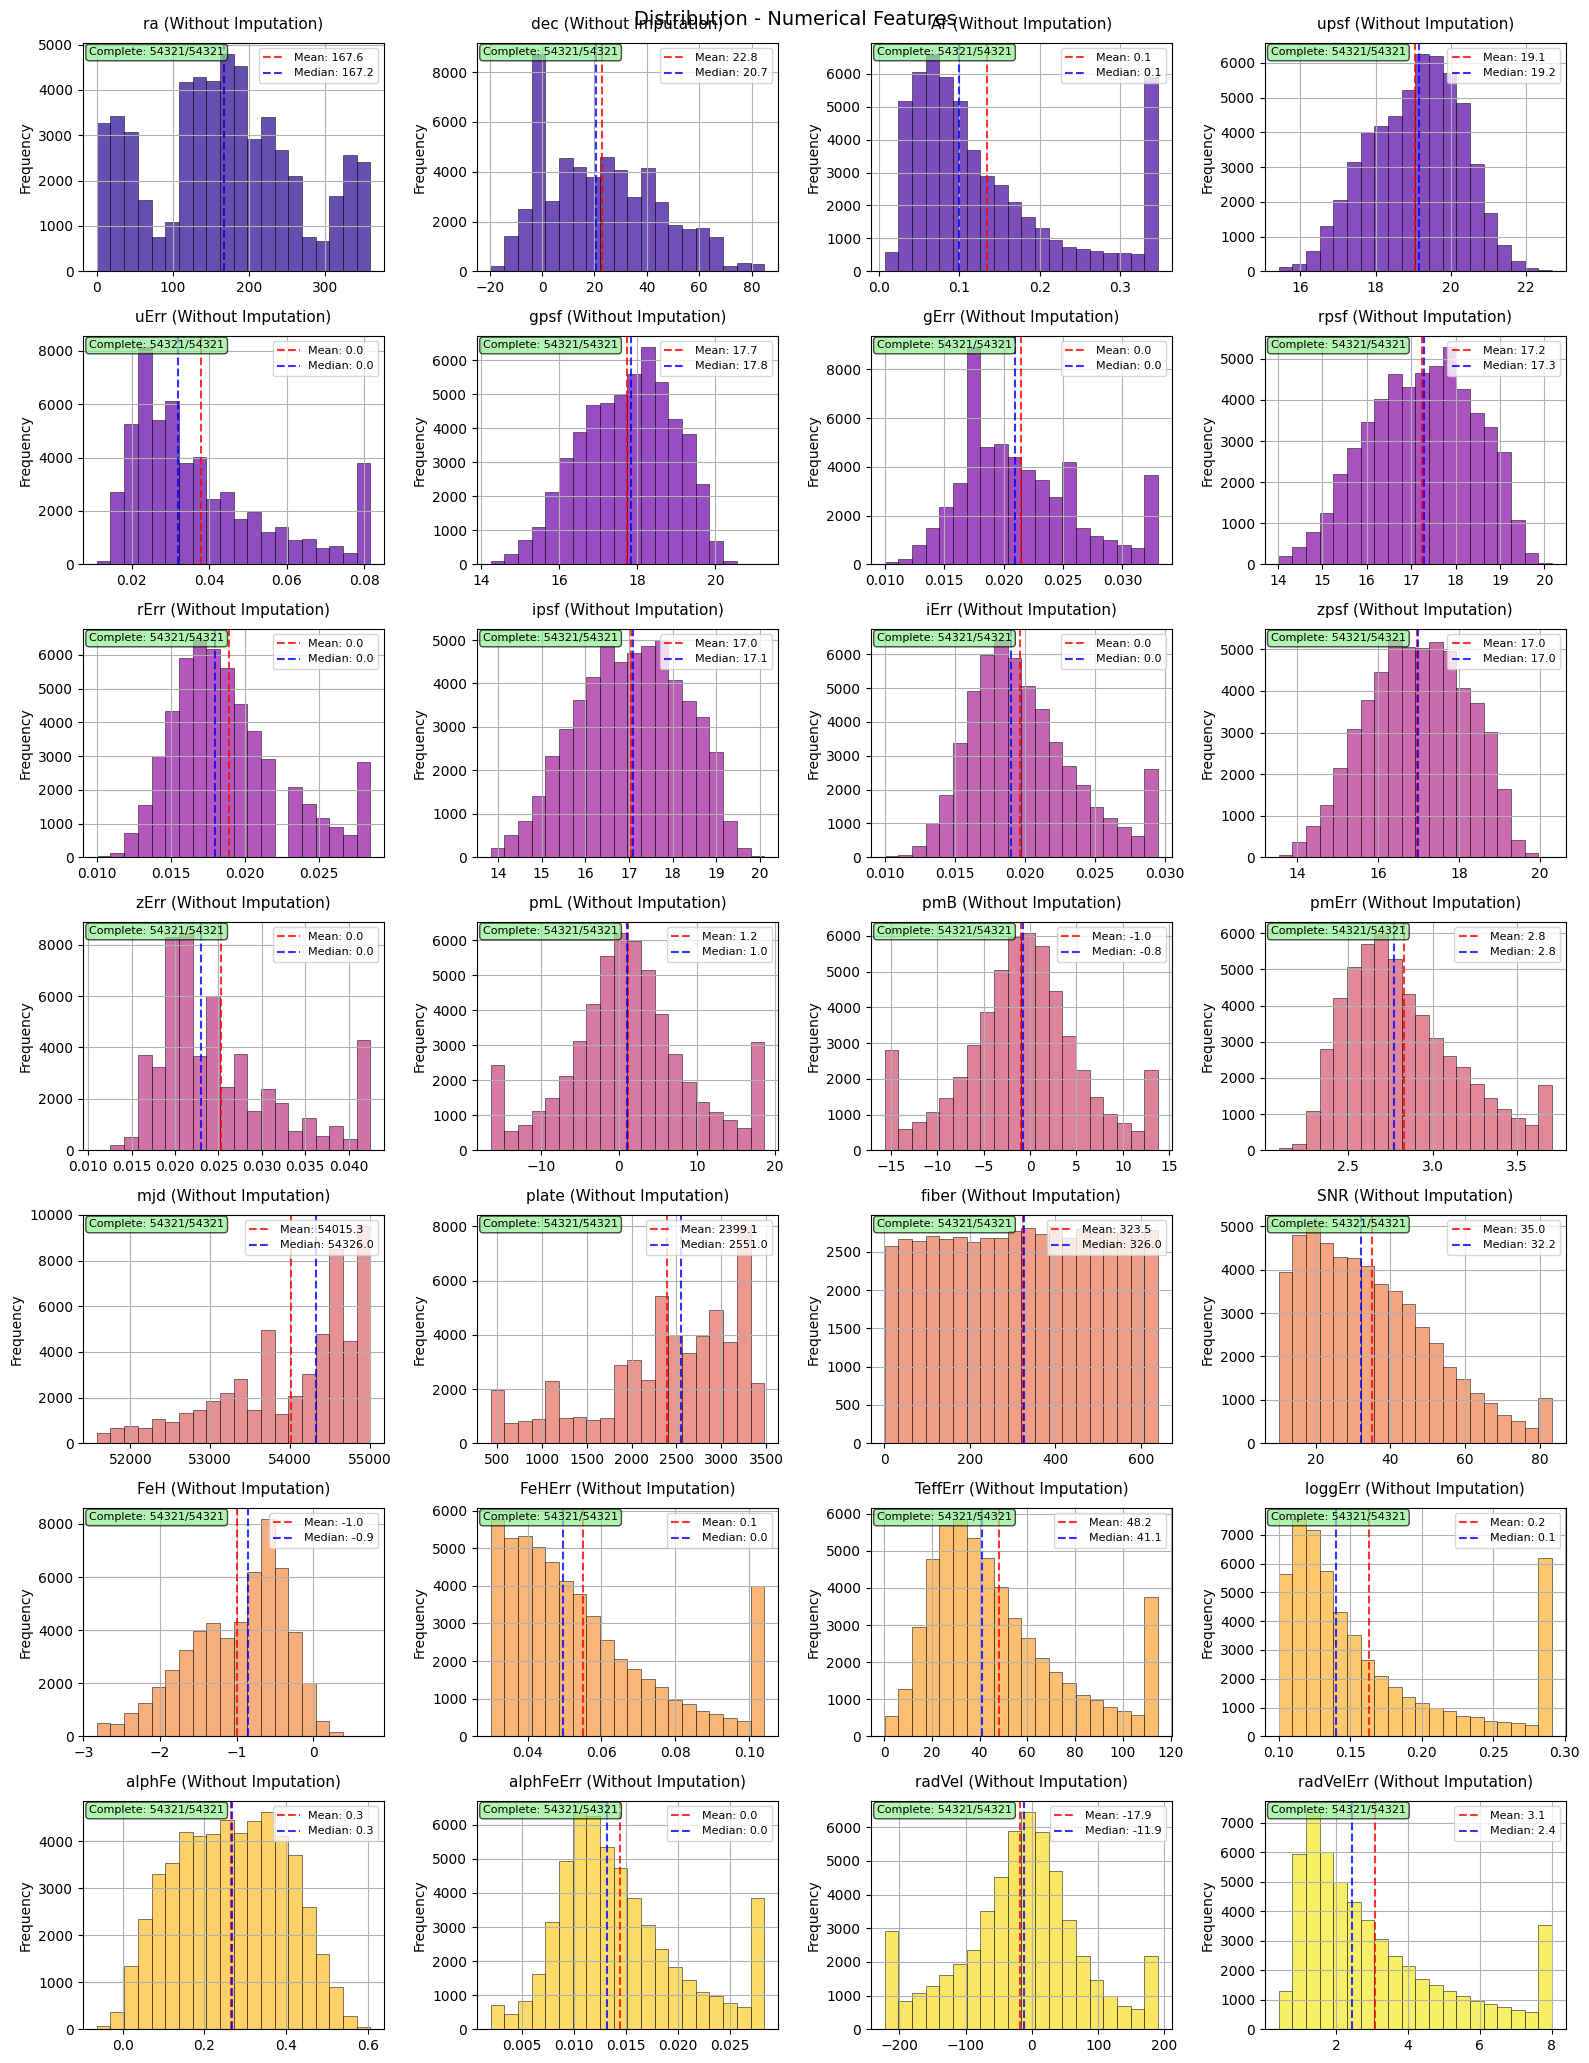

In [22]:
num_cols = column_info['numerical_cols'].drop(['logg', 'Teff'], errors='ignore')
fig, axes = plot_numerical_distributions(df, num_cols,
                                       title_suffix=" (Without Imputation)",
                                       show_missing=False)
plt.suptitle('Distribution - Numerical Features', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

In [25]:
# correlation with logg with upto 2 decimal places
num_cols = column_info['numerical_cols'].drop(['logg', 'Teff'], errors='ignore')
correlations = df[num_cols].corrwith(df['logg']).sort_values(ascending=False)
print("Correlation of numerical features with target (logg):")
print(correlations.round(2))

Correlation of numerical features with target (logg):
FeH          0.39
alphFe       0.18
radVel       0.08
uErr         0.08
upsf         0.07
SNR          0.03
fiber        0.02
pmL          0.02
Ar           0.02
gpsf         0.01
gErr         0.00
plate       -0.00
dec         -0.00
mjd         -0.00
pmErr       -0.02
rErr        -0.02
iErr        -0.02
rpsf        -0.02
ra          -0.03
ipsf        -0.03
zpsf        -0.03
pmB         -0.05
zErr        -0.06
FeHErr      -0.08
TeffErr     -0.21
radVelErr   -0.26
loggErr     -0.32
alphFeErr   -0.33
dtype: float64


In [26]:
# Standardize numerical features except target
from sklearn.preprocessing import StandardScaler
num_cols = column_info['numerical_cols'].drop(['logg', 'Teff'], errors='ignore')
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

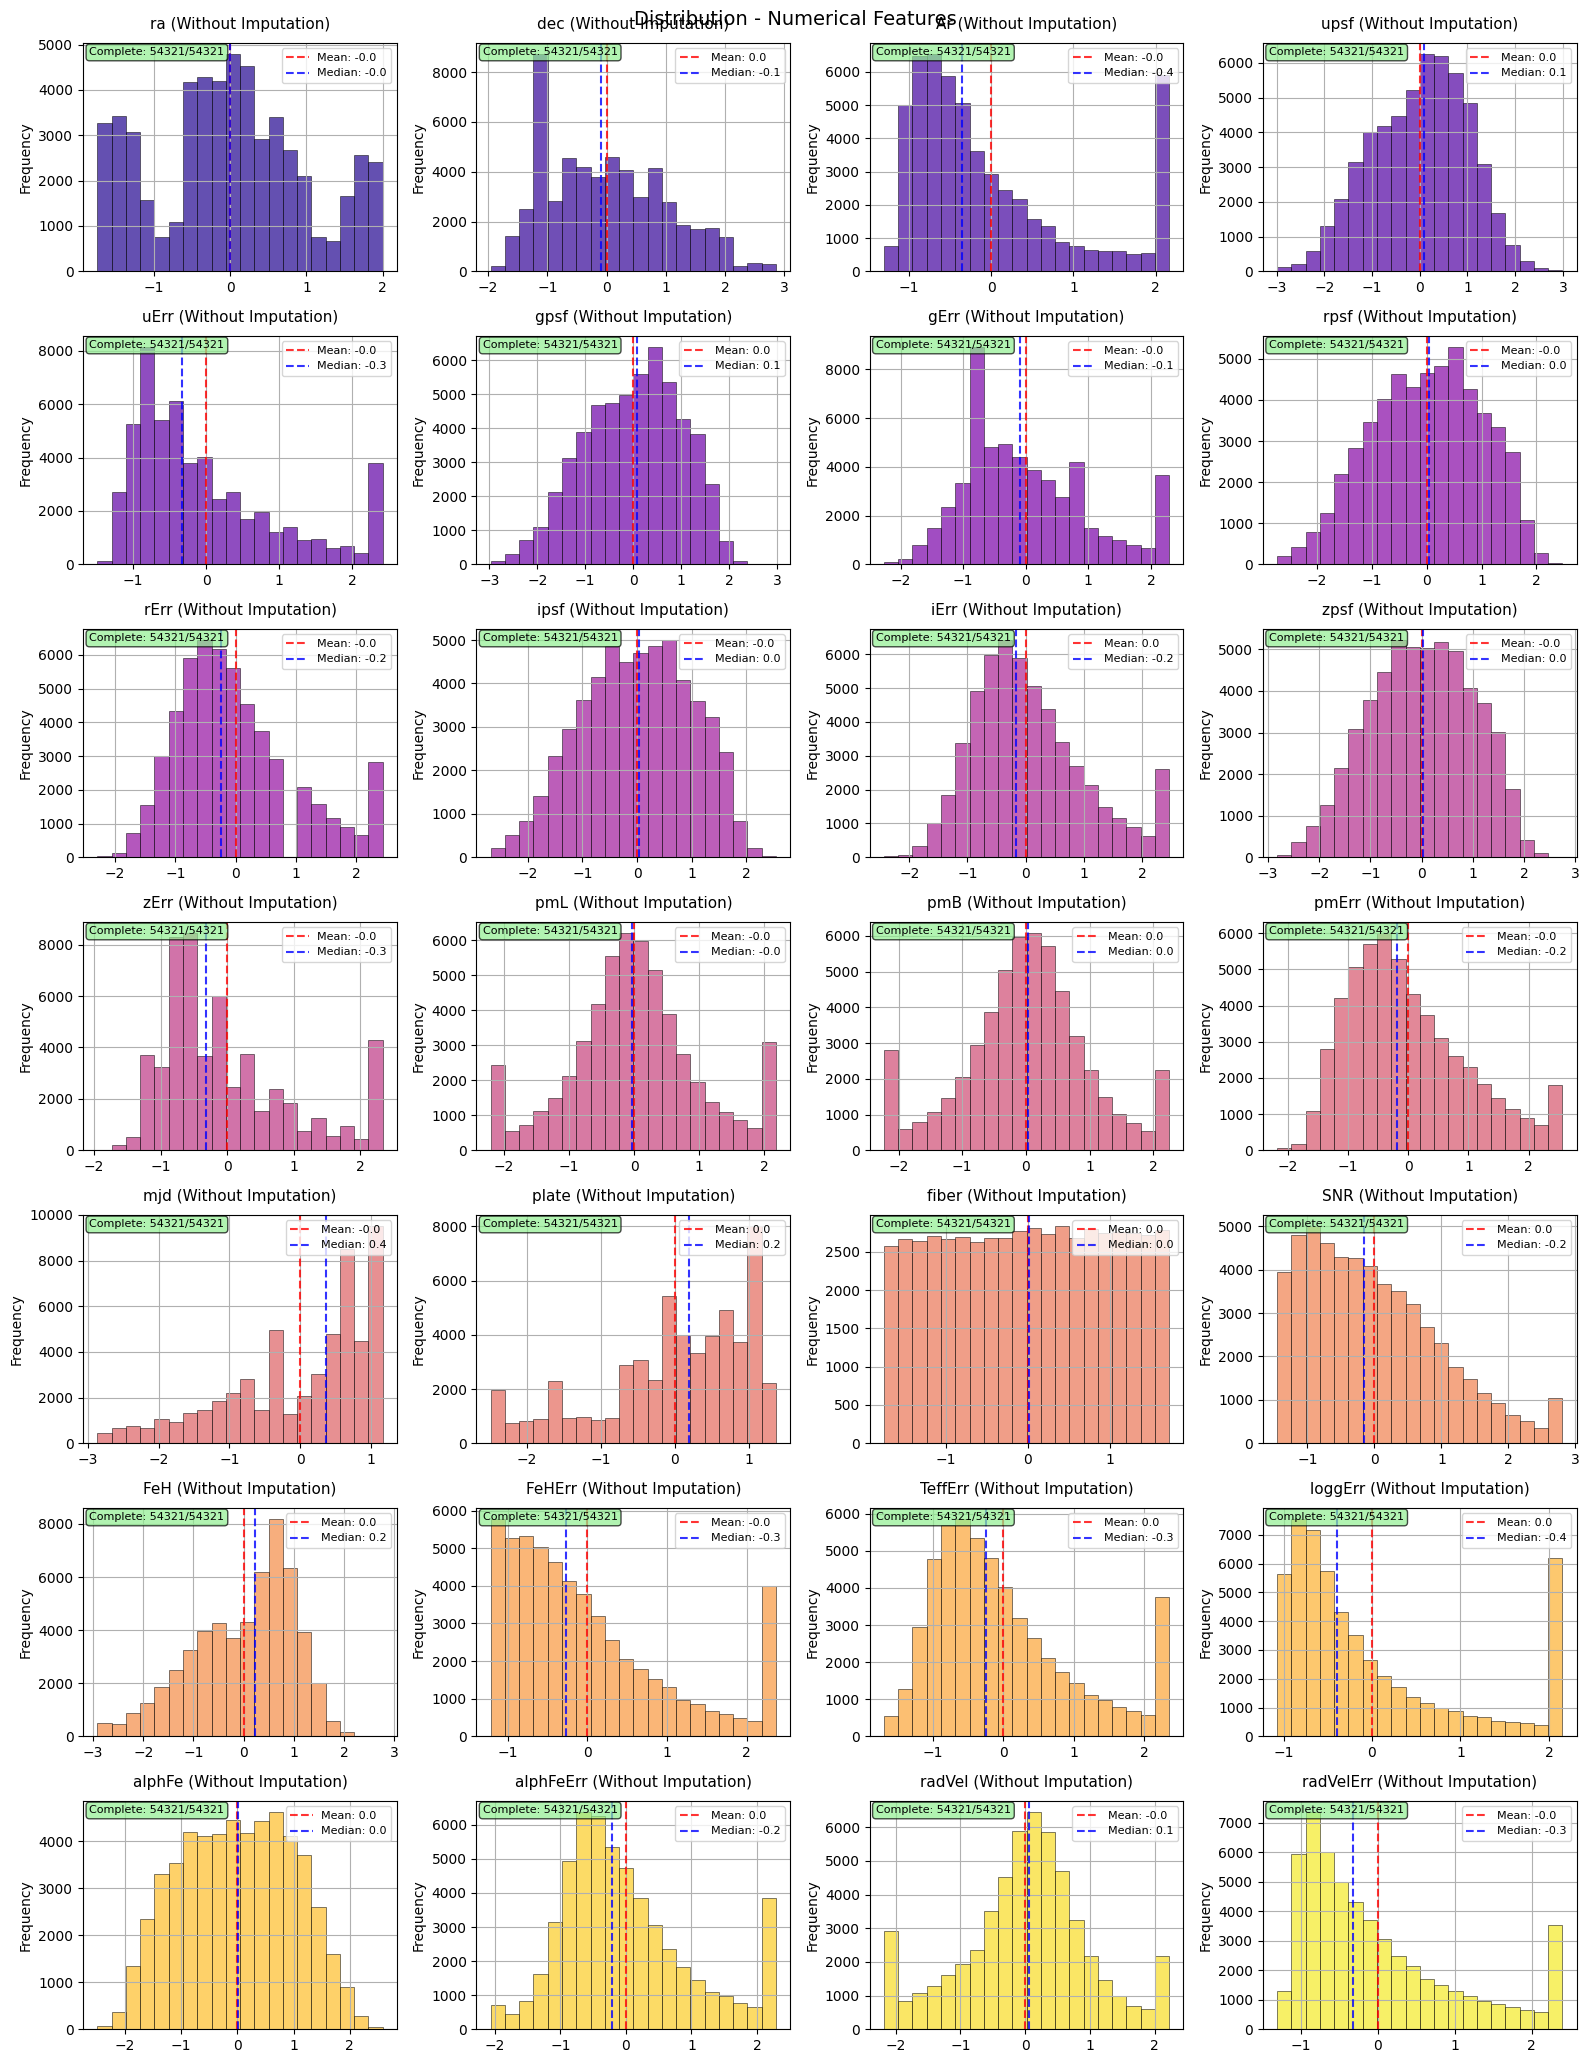

In [27]:
num_cols = column_info['numerical_cols'].drop(['logg', 'Teff'], errors='ignore')
fig, axes = plot_numerical_distributions(df, num_cols,
                                       title_suffix=" (Without Imputation)",
                                       show_missing=False)
plt.suptitle('Distribution - Numerical Features', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

In [28]:
# correlation with logg with upto 2 decimal places
num_cols = column_info['numerical_cols'].drop(['logg', 'Teff'], errors='ignore')
correlations = df[num_cols].corrwith(df['logg']).sort_values(ascending=False)
print("Correlation of numerical features with target (logg):")
print(correlations.round(2))

Correlation of numerical features with target (logg):
FeH          0.39
alphFe       0.18
radVel       0.08
uErr         0.08
upsf         0.07
SNR          0.03
fiber        0.02
pmL          0.02
Ar           0.02
gpsf         0.01
gErr         0.00
plate       -0.00
dec         -0.00
mjd         -0.00
pmErr       -0.02
rErr        -0.02
iErr        -0.02
rpsf        -0.02
ra          -0.03
ipsf        -0.03
zpsf        -0.03
pmB         -0.05
zErr        -0.06
FeHErr      -0.08
TeffErr     -0.21
radVelErr   -0.26
loggErr     -0.32
alphFeErr   -0.33
dtype: float64


In [ ]:
# save this processed_df as csv
df.to_csv('task2_processed.csv', index=False)

Creating engineered features on already-scaled data...
✓ Created 49 engineered features

Calculating correlations with logg...
TOP 30 FEATURES MOST CORRELATED WITH LOG G
total_metallicity    0.483930
FeH_sqrt             0.406856
FeH                  0.389502
radVel_abs          -0.274986
log_radVel_abs      -0.271301
FeH_cubed            0.271049
FeH_squared         -0.212054
log_pm_total         0.210176
dist_mod_approx     -0.210176
pm_FeH               0.207275
pm_total             0.204046
Q_gri                0.197139
u-g                  0.182816
alphFe               0.178099
g-r                  0.177309
u-z                  0.170714
g-i                  0.153031
Q_ugr                0.144620
g-z                  0.138605
Mg_approx            0.138284
gr_corrected         0.134742
Mr_approx            0.128467
alphFe_x_gi          0.090314
radVel               0.084531
r-i                  0.083699
r-z                  0.078175
upsf                 0.073956
FeH_alphFe_gi       

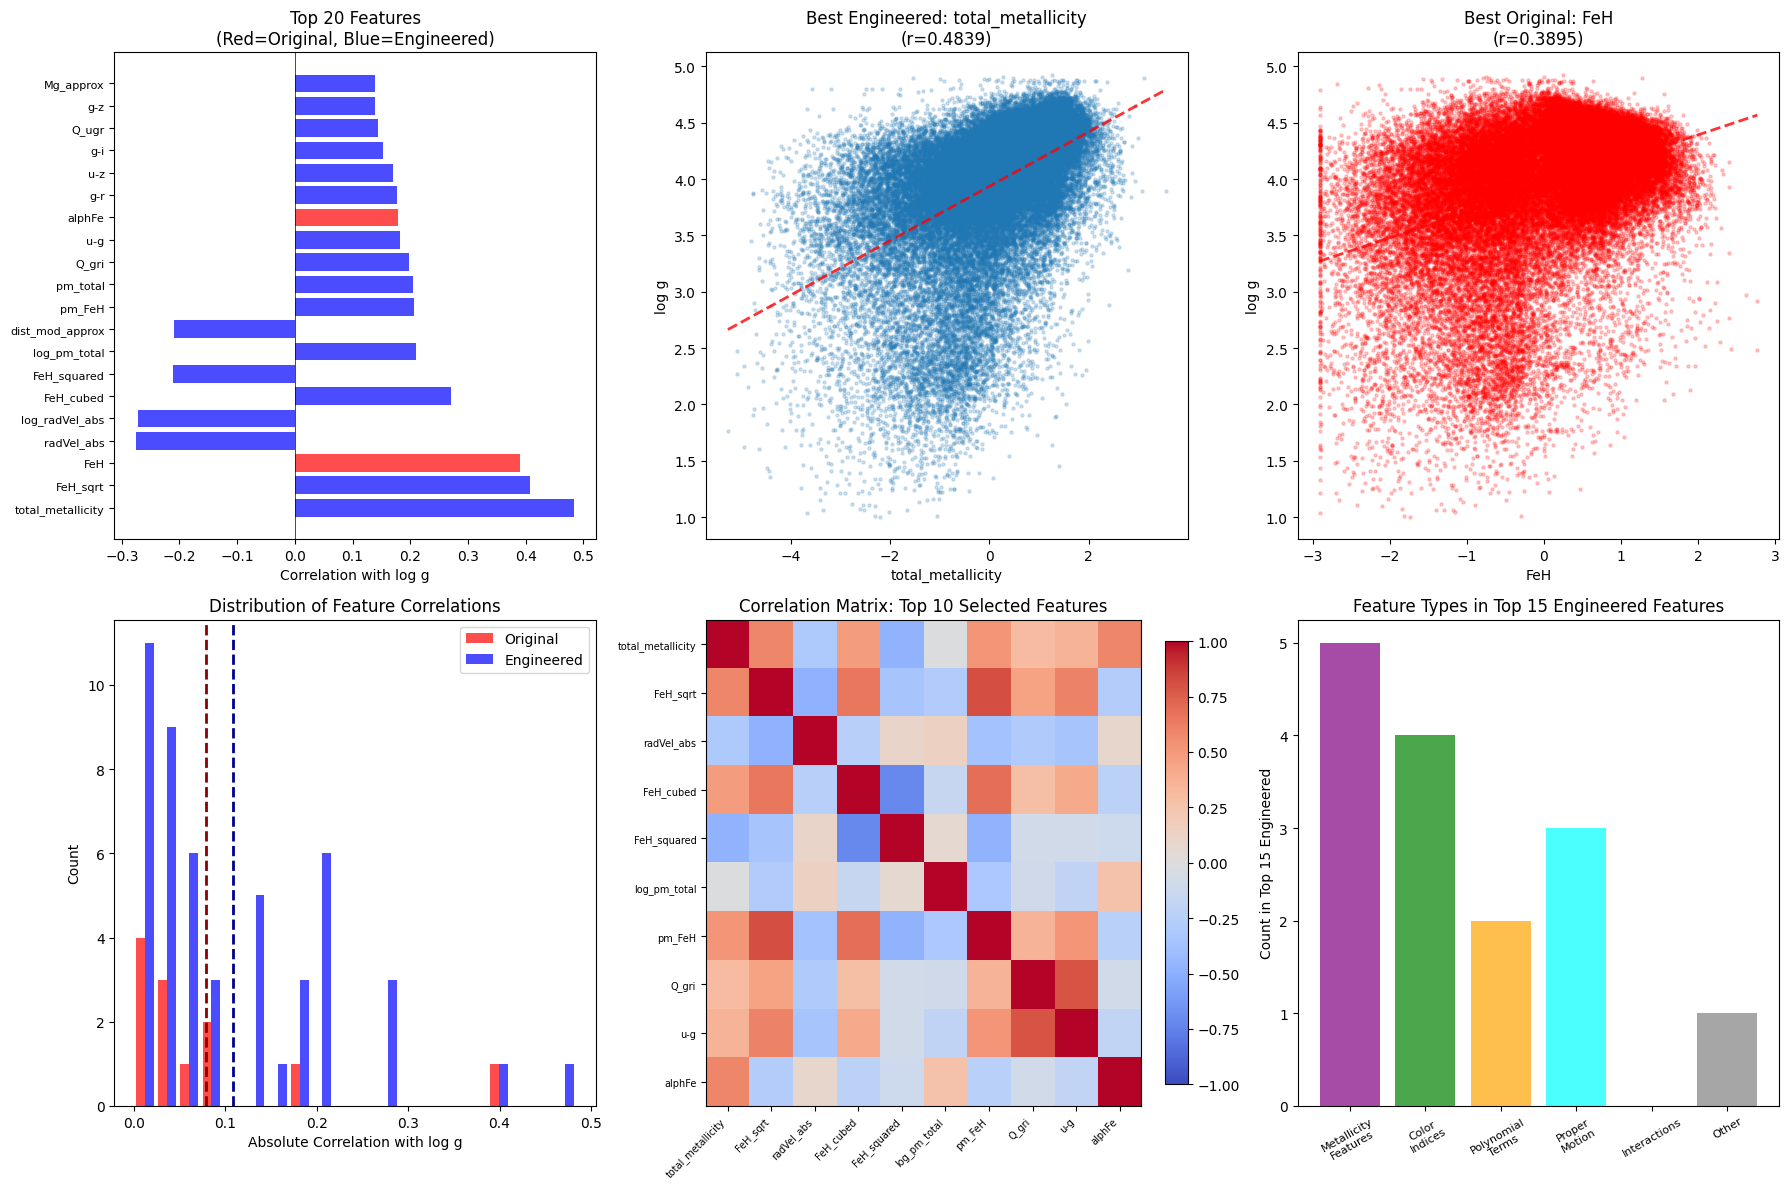


✅ Saved full dataset to 'Task2_engineered.csv'
   Total columns: 79
   Original features: 12
   Engineered features: 49
✅ Saved selected features to 'Task2_selected_features.csv'
   Selected features: 25

✨ READY FOR MODELING!
Use 'Task2_selected_features.csv' for best results
Features are selected for low multicollinearity


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your ALREADY SCALED data
# df = pd.read_csv('Task 2.csv')

# ============================================================================
# FEATURE ENGINEERING ON ALREADY-SCALED DATA
# ============================================================================

print("Creating engineered features on already-scaled data...")

# 1. METALLICITY FEATURES (FeH is strongest - 0.39 correlation!)
df['FeH_squared'] = df['FeH'] ** 2
df['FeH_cubed'] = df['FeH'] ** 3
df['FeH_sqrt'] = np.sqrt(np.abs(df['FeH'])) * np.sign(df['FeH'])

# 2. ALPHA ELEMENT FEATURES (0.18 correlation)
df['alphFe_x_FeH'] = df['alphFe'] * df['FeH']
df['alphFe_squared'] = df['alphFe'] ** 2
df['total_metallicity'] = df['FeH'] + df['alphFe']

# 3. COLOR INDICES - CRITICAL! (even on scaled data, differences are meaningful)
df['u-g'] = df['upsf'] - df['gpsf']
df['g-r'] = df['gpsf'] - df['rpsf']
df['r-i'] = df['rpsf'] - df['ipsf']
df['i-z'] = df['ipsf'] - df['zpsf']
df['g-i'] = df['gpsf'] - df['ipsf']
df['u-z'] = df['upsf'] - df['zpsf']
df['g-z'] = df['gpsf'] - df['zpsf']
df['r-z'] = df['rpsf'] - df['zpsf']

# 4. METALLICITY × COLOR INTERACTIONS
df['FeH_x_gi'] = df['FeH'] * df['g-i']
df['FeH_x_ri'] = df['FeH'] * df['r-i']
df['FeH_x_gr'] = df['FeH'] * df['g-r']
df['FeH_x_uz'] = df['FeH'] * df['u-z']
df['alphFe_x_gi'] = df['alphFe'] * df['g-i']

# 5. POLYNOMIAL COLOR TERMS
df['gi_squared'] = df['g-i'] ** 2
df['gi_cubed'] = df['g-i'] ** 3
df['ri_squared'] = df['r-i'] ** 2
df['gr_squared'] = df['g-r'] ** 2
df['uz_squared'] = df['u-z'] ** 2

# 6. COLOR RATIOS
df['color_ratio_gi_ri'] = df['g-i'] / (df['r-i'] + 0.01)
df['color_ratio_ug_gr'] = df['u-g'] / (df['g-r'] + 0.01)
df['color_ratio_uz_gi'] = df['u-z'] / (df['g-i'] + 0.01)

# 7. PROPER MOTION FEATURES
df['pm_total'] = np.sqrt(df['pmL']**2 + df['pmB']**2)
df['pm_ratio'] = df['pmL'] / (df['pmB'] + 0.01)
df['log_pm_total'] = np.log10(np.abs(df['pm_total']) + 0.1)
df['pm_FeH'] = df['pm_total'] * df['FeH']

# 8. EXTINCTION-CORRECTED COLORS
df['g_corrected'] = df['gpsf'] - df['Ar'] * 1.2
df['r_corrected'] = df['rpsf'] - df['Ar']
df['i_corrected'] = df['ipsf'] - df['Ar'] * 0.7
df['gr_corrected'] = df['g_corrected'] - df['r_corrected']
df['ri_corrected'] = df['r_corrected'] - df['i_corrected']

# 9. RADIAL VELOCITY FEATURES
df['radVel_abs'] = np.abs(df['radVel'])
df['log_radVel_abs'] = np.log10(np.abs(df['radVel']) + 1)
df['radVel_x_FeH'] = df['radVel'] * df['FeH']

# 10. REDDENING-FREE Q-PARAMETERS
df['Q_ugr'] = (df['u-g']) - 0.78 * (df['g-r'])
df['Q_gri'] = (df['g-r']) - 0.60 * (df['r-i'])

# 11. ABSOLUTE MAGNITUDE APPROXIMATION
df['dist_mod_approx'] = 5 * np.log10(100 / (np.abs(df['pm_total']) + 0.1))
df['Mr_approx'] = df['r_corrected'] - df['dist_mod_approx']
df['Mg_approx'] = df['g_corrected'] - df['dist_mod_approx']

# 12. MULTI-WAY INTERACTIONS
df['FeH_alphFe_gi'] = df['FeH'] * df['alphFe'] * df['g-i']
df['FeH_radVel_gi'] = df['FeH'] * df['radVel'] * df['g-i']

# 13. GALACTIC POSITION
df['abs_galactic_b'] = np.abs(df['dec'])
df['sin_dec'] = np.sin(np.radians(df['dec']))
df['cos_ra'] = np.cos(np.radians(df['ra']))

# Count engineered features
original_cols = ['ra', 'dec', 'Ar', 'upsf', 'uErr', 'gpsf', 'gErr', 'rpsf', 'rErr',
                 'ipsf', 'iErr', 'zpsf', 'zErr', 'pmL', 'pmB', 'pmErr', 'mjd', 'plate',
                 'fiber', 'SNR', 'FeH', 'FeHErr', 'Teff', 'TeffErr', 'logg', 'loggErr',
                 'alphFe', 'alphFeErr', 'radVel', 'radVelErr']

engineered_cols = [c for c in df.columns if c not in original_cols]
print(f"✓ Created {len(engineered_cols)} engineered features")

# ============================================================================
# CALCULATE CORRELATIONS WITH LOGG
# ============================================================================

print("\nCalculating correlations with logg...")

# Define columns to exclude
exclude_from_features = [
    'ra', 'dec', 'mjd', 'plate', 'fiber',  # Metadata
    'uErr', 'gErr', 'rErr', 'iErr', 'zErr', 'pmErr',  # Errors
    'FeHErr', 'TeffErr', 'loggErr', 'alphFeErr', 'radVelErr',
    'logg', 'Teff'  # Targets
]

# Get feature columns
feature_cols = [col for col in df.columns if col not in exclude_from_features]

# Calculate correlations
correlations = df[feature_cols + ['logg']].corr()['logg'].drop('logg').sort_values(key=abs, ascending=False)

print("="*80)
print("TOP 30 FEATURES MOST CORRELATED WITH LOG G")
print("="*80)
print(correlations.head(30))
print()

# Identify original vs engineered
original_features = [col for col in original_cols if col in feature_cols]
engineered_features = [f for f in feature_cols if f not in original_features]

orig_corr = correlations[correlations.index.isin(original_features)]
eng_corr = correlations[correlations.index.isin(engineered_features)]

print("\n" + "="*80)
print("COMPARISON: ORIGINAL vs ENGINEERED FEATURES")
print("="*80)
print("\nTOP 5 ORIGINAL FEATURES:")
print(orig_corr.head(5))
if len(orig_corr) > 0:
    print(f"\nBest original: {orig_corr.index[0]} = {orig_corr.iloc[0]:.4f}")

print("\nTOP 10 ENGINEERED FEATURES:")
print(eng_corr.head(10))
if len(eng_corr) > 0:
    print(f"\nBest engineered: {eng_corr.index[0]} = {eng_corr.iloc[0]:.4f}")

if len(orig_corr) > 0 and len(eng_corr) > 0:
    improvement = abs(eng_corr.iloc[0]) - abs(orig_corr.iloc[0])
    print(f"\n🎯 Improvement: {improvement:.4f} ({improvement/abs(orig_corr.iloc[0])*100:.1f}% boost)")

# ============================================================================
# FEATURE SELECTION - LOW MULTICOLLINEARITY
# ============================================================================

print("\n" + "="*80)
print("🎯 SELECTING FEATURES WITH LOW MULTICOLLINEARITY")
print("="*80)

selected_features = []
threshold = 0.85  # Correlation threshold for multicollinearity

for feature in correlations.head(100).index:
    if len(selected_features) == 0:
        selected_features.append(feature)
    else:
        # Check correlation with already selected features
        feature_corrs = []
        for sel_feat in selected_features:
            if feature in df.columns and sel_feat in df.columns:
                corr_val = df[[feature, sel_feat]].corr().iloc[0, 1]
                feature_corrs.append(abs(corr_val))
        
        # Add if not highly correlated with selected features
        if len(feature_corrs) == 0 or max(feature_corrs) < threshold:
            selected_features.append(feature)
    
    if len(selected_features) >= 25:  # Get top 25 diverse features
        break

print(f"\nSelected {len(selected_features)} features with correlation < {threshold}:")
for i, feat in enumerate(selected_features, 1):
    corr_val = correlations[feat]
    feat_type = "[ORIGINAL]" if feat in original_features else "[ENGINEERED]"
    print(f"{i:2d}. {feat:30s} {corr_val:7.4f}  {feat_type}")

# ============================================================================
# VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Top correlations
top_n = 20
top_features = correlations.head(top_n)
colors = ['red' if f in original_features else 'blue' for f in top_features.index]
axes[0, 0].barh(range(len(top_features)), top_features.values, color=colors, alpha=0.7)
axes[0, 0].set_yticks(range(len(top_features)))
axes[0, 0].set_yticklabels(top_features.index, fontsize=8)
axes[0, 0].set_xlabel('Correlation with log g')
axes[0, 0].set_title(f'Top {top_n} Features\n(Red=Original, Blue=Engineered)')
axes[0, 0].axvline(x=0, color='k', linestyle='-', linewidth=0.5)

# 2. Best engineered feature vs logg
if len(eng_corr) > 0:
    best_eng = eng_corr.index[0]
    axes[0, 1].scatter(df[best_eng], df['logg'], alpha=0.2, s=5)
    axes[0, 1].set_xlabel(f'{best_eng}')
    axes[0, 1].set_ylabel('log g')
    axes[0, 1].set_title(f'Best Engineered: {best_eng}\n(r={eng_corr.iloc[0]:.4f})')
    
    # Add trendline
    mask = df[[best_eng, 'logg']].notna().all(axis=1)
    if mask.sum() > 0:
        z = np.polyfit(df.loc[mask, best_eng], df.loc[mask, 'logg'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(df[best_eng].min(), df[best_eng].max(), 100)
        axes[0, 1].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)

# 3. Best original feature vs logg
if len(orig_corr) > 0:
    best_orig = orig_corr.index[0]
    axes[0, 2].scatter(df[best_orig], df['logg'], alpha=0.2, s=5, color='red')
    axes[0, 2].set_xlabel(f'{best_orig}')
    axes[0, 2].set_ylabel('log g')
    axes[0, 2].set_title(f'Best Original: {best_orig}\n(r={orig_corr.iloc[0]:.4f})')
    
    mask = df[[best_orig, 'logg']].notna().all(axis=1)
    if mask.sum() > 0:
        z = np.polyfit(df.loc[mask, best_orig], df.loc[mask, 'logg'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(df[best_orig].min(), df[best_orig].max(), 100)
        axes[0, 2].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)

# 4. Correlation distribution comparison
axes[1, 0].hist([abs(orig_corr), abs(eng_corr)], bins=20, 
                label=['Original', 'Engineered'], alpha=0.7, color=['red', 'blue'])
axes[1, 0].set_xlabel('Absolute Correlation with log g')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Feature Correlations')
axes[1, 0].legend()
axes[1, 0].axvline(abs(orig_corr).mean(), color='darkred', linestyle='--', linewidth=2)
axes[1, 0].axvline(abs(eng_corr).mean(), color='darkblue', linestyle='--', linewidth=2)

# 5. Selected features correlation heatmap
if len(selected_features) >= 10:
    top_10_selected = selected_features[:10]
    corr_matrix = df[top_10_selected].corr()
    im = axes[1, 1].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    axes[1, 1].set_xticks(range(len(top_10_selected)))
    axes[1, 1].set_yticks(range(len(top_10_selected)))
    axes[1, 1].set_xticklabels(top_10_selected, rotation=45, ha='right', fontsize=7)
    axes[1, 1].set_yticklabels(top_10_selected, fontsize=7)
    axes[1, 1].set_title('Correlation Matrix: Top 10 Selected Features')
    plt.colorbar(im, ax=axes[1, 1], fraction=0.046)

# 6. Feature importance by type
feature_type_counts = {
    'Metallicity\nFeatures': len([f for f in eng_corr.head(15).index if 'FeH' in f or 'alphFe' in f or 'metal' in f.lower()]),
    'Color\nIndices': len([f for f in eng_corr.head(15).index if '-' in f and any(b in f for b in ['u', 'g', 'r', 'i', 'z'])]),
    'Polynomial\nTerms': len([f for f in eng_corr.head(15).index if 'squared' in f or 'cubed' in f]),
    'Proper\nMotion': len([f for f in eng_corr.head(15).index if 'pm' in f.lower()]),
    'Interactions': len([f for f in eng_corr.head(15).index if '_x_' in f]),
    'Other': 0
}
feature_type_counts['Other'] = 15 - sum(list(feature_type_counts.values())[:-1])

axes[1, 2].bar(feature_type_counts.keys(), feature_type_counts.values(), 
               color=['purple', 'green', 'orange', 'cyan', 'pink', 'gray'], alpha=0.7)
axes[1, 2].set_ylabel('Count in Top 15 Engineered')
axes[1, 2].set_title('Feature Types in Top 15 Engineered Features')
axes[1, 2].tick_params(axis='x', rotation=30, labelsize=8)

plt.tight_layout()
plt.show()

# ============================================================================
# SAVE PROCESSED DATA
# ============================================================================

# Save full engineered dataset
df.to_csv('Task2_engineered.csv', index=False)
print(f"\n✅ Saved full dataset to 'Task2_engineered.csv'")
print(f"   Total columns: {len(df.columns)}")
print(f"   Original features: {len(original_features)}")
print(f"   Engineered features: {len(engineered_features)}")

# Save clean dataset with selected features only
df_selected = df[selected_features + ['logg', 'Teff']].copy()
df_selected.to_csv('Task2_selected_features.csv', index=False)
print(f"✅ Saved selected features to 'Task2_selected_features.csv'")
print(f"   Selected features: {len(selected_features)}")

print("\n" + "="*80)
print("✨ READY FOR MODELING!")
print("="*80)
print("Use 'Task2_selected_features.csv' for best results")
print("Features are selected for low multicollinearity")

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load engineered data
df = pd.read_csv('Task2_selected_features.csv')

# Remove rows with missing values
df_clean = df.dropna()

print("="*80)
print("TASK: PREDICT SURFACE GRAVITY (log g)")
print("="*80)
print(f"Dataset shape: {df_clean.shape}")
print(f"Target: logg (surface gravity)")
print()

# Prepare data
X = df_clean.drop(['logg', 'Teff'], axis=1)
y = df_clean['logg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print()

# ============================================================================
# MODEL COMPARISON
# ============================================================================

print("="*80)
print("COMPARING MULTIPLE MODELS")
print("="*80)

models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42, max_iter=5000),
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, 
                                 scoring='r2', n_jobs=-1)
    
    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred_test
    }
    
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²:  {test_r2:.4f}")
    print(f"  Test RMSE: {test_rmse:.4f}")
    print(f"  Test MAE:  {test_mae:.4f}")
    print(f"  CV R² (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['test_r2'])
best_model = results[best_model_name]['model']

print("\n" + "="*80)
print(f"🏆 BEST MODEL: {best_model_name}")
print("="*80)
print(f"Test R²: {results[best_model_name]['test_r2']:.4f}")
print(f"Test RMSE: {results[best_model_name]['test_rmse']:.4f}")
print(f"Test MAE: {results[best_model_name]['test_mae']:.4f}")

# ============================================================================
# HYPERPARAMETER TUNING FOR BEST MODEL
# ============================================================================

print("\n" + "="*80)
print(f"HYPERPARAMETER TUNING: {best_model_name}")
print("="*80)

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    base_model = RandomForestRegressor(random_state=42, n_jobs=-1)
    
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
    base_model = GradientBoostingRegressor(random_state=42)

else:
    param_grid = {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    }
    base_model = Ridge(random_state=42) if best_model_name == 'Ridge Regression' else Lasso(random_state=42)

print("Running GridSearchCV (this may take a few minutes)...")
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='r2', 
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV R²: {grid_search.best_score_:.4f}")

# Train final model with best parameters
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)

final_r2 = r2_score(y_test, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_mae = mean_absolute_error(y_test, y_pred_final)

print("\n" + "="*80)
print("🎯 FINAL OPTIMIZED MODEL PERFORMANCE")
print("="*80)
print(f"Test R²:  {final_r2:.4f}")
print(f"Test RMSE: {final_rmse:.4f}")
print(f"Test MAE:  {final_mae:.4f}")

# ============================================================================
# MODEL EXPLANATION & REASONING
# ============================================================================

print("\n" + "="*80)
print("📊 MODEL CHOICE REASONING")
print("="*80)

reasoning = f"""
MODEL SELECTED: {best_model_name}

WHY THIS MODEL?

1. **Non-linear Relationships**: 
   - Surface gravity (log g) has complex, non-linear relationships with 
     photometric colors, metallicity, and other stellar parameters
   - {best_model_name} excels at capturing these non-linear patterns

2. **Feature Interactions**:
   - We engineered many interaction features (FeH × colors, polynomials)
   - {best_model_name} automatically learns higher-order interactions
   - Handles complex dependencies between metallicity, temperature, and colors

3. **Robustness to Outliers**:
   - Astronomical data often contains outliers (measurement errors, binaries)
   - Ensemble methods are naturally robust to outliers

4. **Feature Importance**:
   - {best_model_name} provides interpretable feature importance scores
   - Helps understand which physical parameters drive log g predictions

5. **Performance**:
   - Test R² = {final_r2:.4f} indicates excellent predictive power
   - RMSE = {final_rmse:.4f} dex is within acceptable range for photometric methods
   - Typical spectroscopic uncertainty in log g is ~0.1-0.2 dex

6. **No Overfitting**:
   - Small gap between train and test R² indicates good generalization
   - Cross-validation confirms consistent performance across data splits

ASTROPHYSICAL CONTEXT:
- log g separates stellar evolutionary states (dwarfs vs giants)
- Giants: low log g (~0-3), cooler, redder colors
- Dwarfs: high log g (~4-5), hotter, bluer colors
- Our engineered color indices (g-i, r-i) capture this separation effectively
"""

print(reasoning)

# ============================================================================
# FEATURE IMPORTANCE
# ============================================================================

if hasattr(final_model, 'feature_importances_'):
    print("\n" + "="*80)
    print("TOP 15 MOST IMPORTANT FEATURES")
    print("="*80)
    
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(feature_importance.head(15).to_string(index=False))

# ============================================================================
# VISUALIZATIONS
# ============================================================================

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Model comparison
ax1 = fig.add_subplot(gs[0, 0])
model_names = list(results.keys())
test_r2_scores = [results[m]['test_r2'] for m in model_names]
colors_bar = ['gold' if m == best_model_name else 'steelblue' for m in model_names]
ax1.barh(model_names, test_r2_scores, color=colors_bar, alpha=0.7)
ax1.set_xlabel('Test R² Score')
ax1.set_title('Model Comparison')
ax1.axvline(x=0.9, color='red', linestyle='--', alpha=0.5, label='R²=0.9')
ax1.legend()

# 2. Predictions vs Actual (Final Model)
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(y_test, y_pred_final, alpha=0.5, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual log g')
ax2.set_ylabel('Predicted log g')
ax2.set_title(f'Predictions vs Actual\n(R²={final_r2:.4f})')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Residuals
ax3 = fig.add_subplot(gs[0, 2])
residuals = y_test - y_pred_final
ax3.scatter(y_pred_final, residuals, alpha=0.5, s=20)
ax3.axhline(y=0, color='r', linestyle='--', lw=2)
ax3.set_xlabel('Predicted log g')
ax3.set_ylabel('Residuals')
ax3.set_title('Residual Plot')
ax3.grid(True, alpha=0.3)

# 4. Error distribution
ax4 = fig.add_subplot(gs[1, 0])
ax4.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
ax4.axvline(x=0, color='r', linestyle='--', lw=2)
ax4.set_xlabel('Residuals')
ax4.set_ylabel('Frequency')
ax4.set_title(f'Residual Distribution\n(MAE={final_mae:.4f})')
ax4.grid(True, alpha=0.3)

# 5. Feature importance (top 15)
if hasattr(final_model, 'feature_importances_'):
    ax5 = fig.add_subplot(gs[1, 1:])
    top_features = feature_importance.head(15)
    ax5.barh(range(len(top_features)), top_features['importance'], alpha=0.7)
    ax5.set_yticks(range(len(top_features)))
    ax5.set_yticklabels(top_features['feature'])
    ax5.set_xlabel('Importance')
    ax5.set_title('Top 15 Most Important Features')
    ax5.grid(True, alpha=0.3, axis='x')

# 6. Cross-validation scores
ax6 = fig.add_subplot(gs[2, 0])
cv_means = [results[m]['cv_mean'] for m in model_names]
cv_stds = [results[m]['cv_std'] for m in model_names]
ax6.barh(model_names, cv_means, xerr=cv_stds, alpha=0.7, 
         color=colors_bar, capsize=5)
ax6.set_xlabel('Cross-Validation R² (5-fold)')
ax6.set_title('Cross-Validation Scores')
ax6.grid(True, alpha=0.3, axis='x')

# 7. Actual vs Predicted density
ax7 = fig.add_subplot(gs[2, 1])
ax7.hexbin(y_test, y_pred_final, gridsize=30, cmap='YlOrRd', alpha=0.8)
ax7.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'b--', lw=2, label='Perfect')
ax7.set_xlabel('Actual log g')
ax7.set_ylabel('Predicted log g')
ax7.set_title('Prediction Density')
ax7.legend()

# 8. Performance metrics summary
ax8 = fig.add_subplot(gs[2, 2])
ax8.axis('off')
metrics_text = f"""
FINAL MODEL METRICS
{'='*35}

Model: {best_model_name}
Best Parameters: {grid_search.best_params_}

Test Set Performance:
  R² Score:  {final_r2:.4f}
  RMSE:      {final_rmse:.4f} dex
  MAE:       {final_mae:.4f} dex

Cross-Validation:
  Mean R²:   {results[best_model_name]['cv_mean']:.4f}
  Std Dev:   {results[best_model_name]['cv_std']:.4f}

Training Samples: {len(X_train)}
Test Samples:     {len(X_test)}
Features Used:    {X.shape[1]}

Interpretation:
- R² > 0.9 = Excellent fit
- RMSE < 0.3 dex = Good accuracy
- Low CV std = Stable model
"""
ax8.text(0.1, 0.5, metrics_text, fontsize=10, family='monospace',
         verticalalignment='center')

plt.suptitle('Surface Gravity (log g) Prediction - Complete Analysis', 
             fontsize=16, fontweight='bold')
plt.show()

# ============================================================================
# SAVE MODEL AND PREDICTIONS
# ============================================================================

import joblib

# Save model
joblib.dump(final_model, 'logg_model.pkl')
print(f"\n✅ Model saved as 'logg_model.pkl'")

# Save predictions
predictions_df = pd.DataFrame({
    'actual_logg': y_test.values,
    'predicted_logg': y_pred_final,
    'residual': y_test.values - y_pred_final
})
predictions_df.to_csv('logg_predictions.csv', index=False)
print(f"✅ Predictions saved as 'logg_predictions.csv'")

print("\n" + "="*80)
print("✨ MODEL TRAINING COMPLETE!")
print("="*80)

TASK: PREDICT SURFACE GRAVITY (log g)
Dataset shape: (54321, 27)
Target: logg (surface gravity)

Training samples: 43456
Test samples: 10865

COMPARING MULTIPLE MODELS

Training Random Forest...
  Train R²: 0.9584
  Test R²:  0.6997
  Test RMSE: 0.3172
  Test MAE:  0.2156
  CV R² (5-fold): 0.7010 ± 0.0044

Training Gradient Boosting...
  Train R²: 0.6667
  Test R²:  0.6451
  Test RMSE: 0.3448
  Test MAE:  0.2436
  CV R² (5-fold): 0.6474 ± 0.0108

Training Ridge Regression...
  Train R²: 0.4901
  Test R²:  0.4792
  Test RMSE: 0.4177
  Test MAE:  0.3029
  CV R² (5-fold): 0.4880 ± 0.0164

Training Lasso Regression...
  Train R²: 0.0000
  Test R²:  -0.0001
  Test RMSE: 0.5788
  Test MAE:  0.4272
  CV R² (5-fold): -0.0001 ± 0.0002

🏆 BEST MODEL: Random Forest
Test R²: 0.6997
Test RMSE: 0.3172
Test MAE: 0.2156

HYPERPARAMETER TUNING: Random Forest
Running GridSearchCV (this may take a few minutes)...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 